Further Data preprocessing steps :


                1. Structure all the images to have same size (height and width) : For getting the appropriate width and height to resize each image  , we need to first do Exploratory Data Analysis
                
                2. Data Labelling


Exploratory Data Analysis


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

from glob import glob 

import cv2 

In [2]:
# Getting the path of all cropped males and females 

fpath = glob("./cropped_data/female/*.jpg")
mpath = glob("./cropped_data/male/*.jpg")

print(len(fpath))
print(len(mpath))

2586
2840


In [3]:
# Creating a df with columns : Filepath and target column : gender 

df_female = pd.DataFrame(fpath , columns = ["filepath"])
df_female['gender'] = 'female'

df_male = pd.DataFrame(mpath , columns = ['filepath'])
df_male['gender'] = 'male'

df = pd.concat([df_female , df_male] , axis = 0)

print(df.shape)
df.head()

(5426, 2)


,filepath,gender
0,./cropped_data/female\female_0.jpg,female
1,./cropped_data/female\female_1.jpg,female
2,./cropped_data/female\female_100.jpg,female
3,./cropped_data/female\female_1002.jpg,female
4,./cropped_data/female\female_1005.jpg,female


In [4]:
df.tail()

,filepath,gender
2835,./cropped_data/male\male_995.jpg,male
2836,./cropped_data/male\male_996.jpg,male
2837,./cropped_data/male\male_997.jpg,male
2838,./cropped_data/male\male_998.jpg,male
2839,./cropped_data/male\male_999.jpg,male


In [5]:
def get_dimensions(file_path):
    img = cv2.imread(file_path)
    height = img.shape[0]
    width = img.shape[1]
    return (height , width)


df[['height' , 'width']] = df['filepath'].apply(get_dimensions).apply(pd.Series)

In [6]:
df.head()

,filepath,gender,height,width
0,./cropped_data/female\female_0.jpg,female,273,273
1,./cropped_data/female\female_1.jpg,female,182,182
2,./cropped_data/female\female_100.jpg,female,122,122
3,./cropped_data/female\female_1002.jpg,female,122,122
4,./cropped_data/female\female_1005.jpg,female,182,182


In [7]:
# Height and the width of each of the cropped image is same 

df.drop(['height'] , axis = 1 , inplace = True)


In [8]:
df.rename(columns = {"width" : "dimension"} , inplace = True)

In [9]:
df.head()

,filepath,gender,dimension
0,./cropped_data/female\female_0.jpg,female,273
1,./cropped_data/female\female_1.jpg,female,182
2,./cropped_data/female\female_100.jpg,female,122
3,./cropped_data/female\female_1002.jpg,female,122
4,./cropped_data/female\female_1005.jpg,female,182


In [10]:
df.shape

(5426, 3)

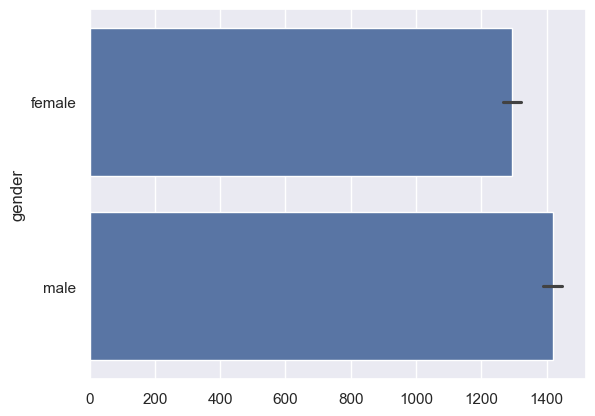

In [11]:
# distribution of gender 

sns.barplot(df['gender'])
plt.show()

In [12]:
# plt.pie(df['gender'] , autopct="%0.0f%%")
# plt.show()

gender_dist = df['gender'].value_counts()
gender_dist

gender
male      2840
female    2586
Name: count, dtype: int64

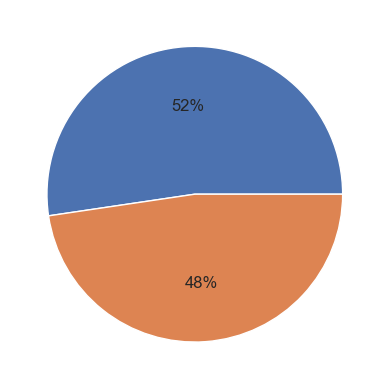

In [13]:
plt.pie(gender_dist ,autopct = "%0.0f%%")
plt.show()

Nearly same distribution of male and female 


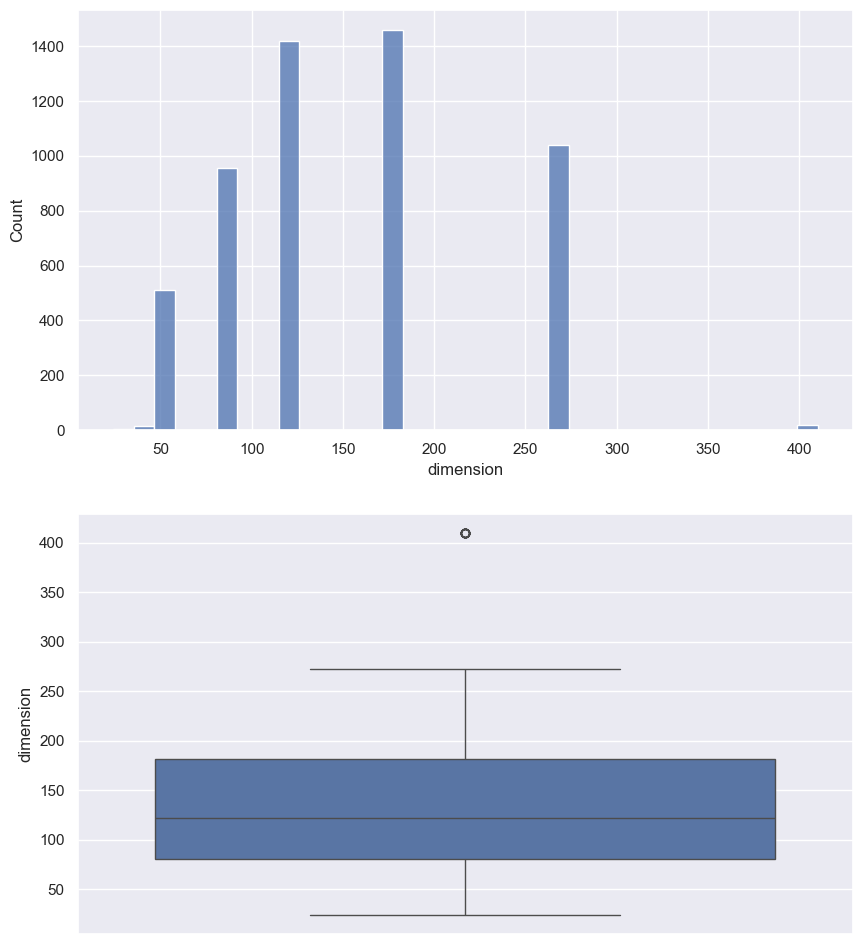

In [14]:
# to select the appropriate dimension for resizing each image : EDA 

# plt.figure(figsize = (10,12))
fig , ax = plt.subplots(nrows = 2 , ncols=1 ,figsize= (10,12))
sns.histplot(df['dimension'] , ax=ax[0])
# plt.show()

# plt.subplots(2,1,2)
sns.boxplot(df['dimension'] , ax = ax[1])

plt.show()



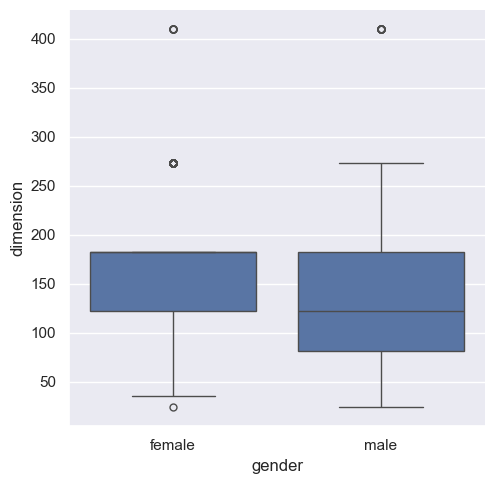

In [15]:
sns.catplot(data = df , x = 'gender' , y  = 'dimension' , kind = 'box')
plt.show()

Most of the images have dimension more than 60 pixels.

Female images are having higher definition than male images . 
Distribution of male and female images is nearly equal 


**Consider all images with greater than or equal to 60 value as dimension** 

**Resize all the images to 100 by 100**

**It is better to reduce the size of the image that to expand the size of the image to make it to a particular dimension. That holds betterquality for model creation .**



1. drop the images with dimensions less that 60 

2. Resize the images all to 100*100 : if dimension greater that 100 : cv2.INTER_AREA 
                                    : if dimension less than 100 : cv2.INTER_CUBIC 

In [16]:
df.shape

(5426, 3)

In [17]:
df.head()

,filepath,gender,dimension
0,./cropped_data/female\female_0.jpg,female,273
1,./cropped_data/female\female_1.jpg,female,182
2,./cropped_data/female\female_100.jpg,female,122
3,./cropped_data/female\female_1002.jpg,female,122
4,./cropped_data/female\female_1005.jpg,female,182


In [18]:
# df_filter = df.query("dimension > 60")
# df_filter.shape

In [19]:
df_filter = df.loc[df['dimension'] > 60]
df_filter.shape

(4894, 3)

In [20]:
df_filter.head()

,filepath,gender,dimension
0,./cropped_data/female\female_0.jpg,female,273
1,./cropped_data/female\female_1.jpg,female,182
2,./cropped_data/female\female_100.jpg,female,122
3,./cropped_data/female\female_1002.jpg,female,122
4,./cropped_data/female\female_1005.jpg,female,182


In [21]:
df_filter = df_filter.reset_index(drop = True)

My method to resize and flatten each image :

In [22]:
# try_data = pd.DataFrame(columns = ["data"])
# for i in range(10):
#     img = cv2.imread(df_filter['filepath'][i])
#     if df_filter['dimension'][i] > 100 : 
#         # shrink the image 
#         resize_img = cv2.resize(src = img , dsize = (100,100) , interpolation = cv2.INTER_AREA )
#     else:
#         resize_img = cv2.resize(src = img , dsize = (100 , 100) , interpolation = cv2.INTER_CUBIC)

#     flatten_img  = resize_img.flatten()

#     try_data.loc[i ,'data'] = flatten_img



In [23]:
# df_filter['filepath'][0]

In [24]:
# try_data.head()

In [25]:
# try_data.loc[0,'data']


# shape = 30000 .. why ?

The shape 30000 , for each image is coming because each image is colored with 3 channels : BGR

It is better to convert it to greyscale then do this processing..

Other Method of resizing and flattening the images :


In [26]:
# define a function that takes an image and resizes it and then flattens it 

def structuring(img_path):
    try:
        # get the image from img_path
        image = cv2.imread(img_path) 
        # convert the image to greyscale for further processing
        gray = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
        # resize the image to shape (100,100) using cv2.INTER_AREA and cv2.INTER_CUBIC
        if gray.shape[0] > 100: 
            resized_img = cv2.resize(gray , (100,100) ,interpolation  = cv2.INTER_AREA)
        elif gray.shape[0] < 100:
            resized_img = cv2.resize(gray , (100,100) ,interpolation  = cv2.INTER_CUBIC)
        else:
            resized_img = gray
        # flatten the image 
        # return the flatten image 
        return resized_img.flatten()
    except:
        return None 
    

# Getting the flatten data for all the images 

df_filter['data'] = df_filter['filepath'].apply(structuring)




In [27]:
df_filter

,filepath,gender,dimension,data
0,./cropped_data/female\female_0.jpg,female,273,"[199, 189, 187, 181, 183, 184, 178, 176, 187, ..."
1,./cropped_data/female\female_1.jpg,female,182,"[31, 25, 33, 28, 29, 29, 31, 33, 35, 35, 50, 7..."
2,./cropped_data/female\female_100.jpg,female,122,"[50, 49, 35, 34, 42, 40, 36, 40, 68, 60, 46, 4..."
3,./cropped_data/female\female_1002.jpg,female,122,"[136, 127, 114, 96, 96, 94, 94, 116, 149, 163,..."
4,./cropped_data/female\female_1005.jpg,female,182,"[234, 236, 234, 232, 229, 186, 139, 105, 59, 4..."
...,...,...,...,...
4889,./cropped_data/male\male_994.jpg,male,122,"[17, 17, 16, 17, 17, 17, 18, 18, 18, 15, 13, 1..."
4890,./cropped_data/male\male_995.jpg,male,273,"[13, 93, 32, 47, 58, 81, 136, 108, 117, 117, 1..."
4891,./cropped_data/male\male_997.jpg,male,122,"[179, 180, 180, 181, 182, 183, 182, 180, 181, ..."
4892,./cropped_data/male\male_998.jpg,male,81,"[38, 37, 37, 38, 39, 40, 39, 38, 38, 39, 37, 3..."


Next steps :
1. Get the each image pixel as separate column 
2. Normalize the image pixels : divide by 255
3. rename the columns for clarity like pixel_1 , pixel_2 .. so on 
4. Add a column gender that will serve as a target column 

5. For clean data : check for missing values : data.isna().sum().sum()
6. If missing values are present : remove them : data.dropna(inplace = True)
7. save the cleaned data for future use : using pickle 


In [28]:
data = df_filter['data'].apply(pd.Series)

In [29]:
data.columns

RangeIndex(start=0, stop=10000, step=1)

In [30]:
data.columns = [f"pixel_{i}" for i in data.columns]

In [31]:
data.columns

Index(['pixel_0', 'pixel_1', 'pixel_2', 'pixel_3', 'pixel_4', 'pixel_5',
       'pixel_6', 'pixel_7', 'pixel_8', 'pixel_9',
       ...
       'pixel_9990', 'pixel_9991', 'pixel_9992', 'pixel_9993', 'pixel_9994',
       'pixel_9995', 'pixel_9996', 'pixel_9997', 'pixel_9998', 'pixel_9999'],
      dtype='object', length=10000)

In [32]:
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9990,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999
0,199,189,187,181,183,184,178,176,187,181,...,109,108,109,111,114,116,121,118,117,119
1,31,25,33,28,29,29,31,33,35,35,...,45,29,23,30,22,34,25,35,55,18
2,50,49,35,34,42,40,36,40,68,60,...,208,227,228,235,237,231,222,215,212,210
3,136,127,114,96,96,94,94,116,149,163,...,68,54,68,67,74,91,97,103,103,96
4,234,236,234,232,229,186,139,105,59,47,...,241,240,237,237,239,238,238,242,241,241


In [33]:
data = data/255

# Normalize the data 

In [34]:
data['gender'] = df_filter['gender']

In [35]:
data.isna().sum().sum()

np.int64(0)

In [36]:
# if missing values present 

# data.dropna(inplace = True)

In [37]:
import pickle 
pickle.dump(data , open('data_images_100_100.pkl' , mode = 'wb'))